In [19]:
import numpy as np
import matplotlib.pyplot as plt
from methods import simulate
import seaborn as sns
import pandas as pd
import time
from scipy.signal import find_peaks

# Parâmetros do modelo
alpha = 0.1
beta = 0.02
delta = 0.02
gamma = 0.4
x0 = 10
y0 = 10
tfinal = 200

# Lista de dt a testar
dt_values = [0.2, 0.1, 0.05, 0.01]

In [20]:
# Obter "solução de referência" com RK4 muito preciso
t_ref, x_ref, y_ref = simulate(x0, y0, alpha, beta, delta, gamma, dt=0.001, t_final=tfinal, method="rk4")

def interp_ref(t_ref, x_ref, y_ref, t_target):
    x_interp = np.interp(t_target, t_ref, x_ref)
    y_interp = np.interp(t_target, t_ref, y_ref)
    return x_interp, y_interp

# Armazenar erros
errors_euler = []
errors_rk4 = []

for dt in dt_values:
    t_e, x_e, y_e = simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "euler")
    t_rk, x_rk, y_rk = simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "rk4")
    
    x_ref_e, y_ref_e = interp_ref(t_ref, x_ref, y_ref, t_e)
    x_ref_rk, y_ref_rk = interp_ref(t_ref, x_ref, y_ref, t_rk)

    err_e = np.mean(np.abs(np.array(x_e) - x_ref_e) + np.abs(np.array(y_e) - y_ref_e))
    err_rk = np.mean(np.abs(np.array(x_rk) - x_ref_rk) + np.abs(np.array(y_rk) - y_ref_rk))

    errors_euler.append(err_e)
    errors_rk4.append(err_rk)

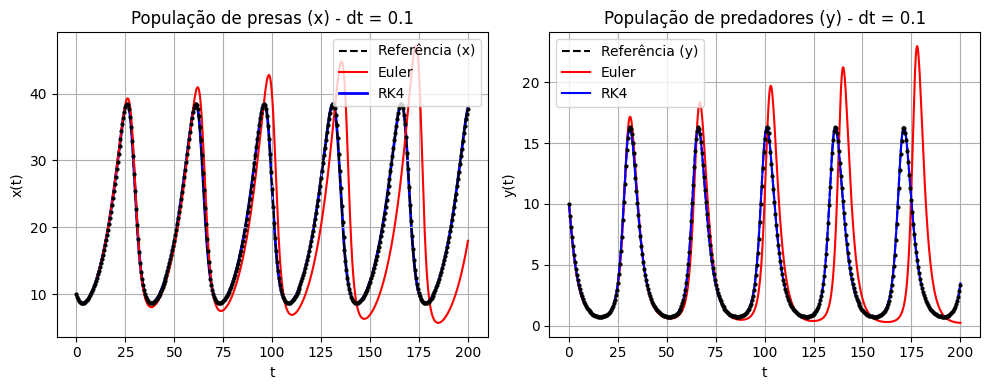

In [21]:
dt_example = 0.1
t_e, x_e, y_e = simulate(x0, y0, alpha, beta, delta, gamma, dt_example, tfinal, "euler")
t_rk, x_rk, y_rk = simulate(x0, y0, alpha, beta, delta, gamma, dt_example, tfinal, "rk4")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t_ref, x_ref, 'k--', linewidth=1.5, label="Referência (x)", zorder=2)
plt.plot(t_ref[::500], x_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(t_e, x_e, 'r-', label="Euler")
plt.plot(t_rk, x_rk, 'b-', label="RK4", linewidth=2.0, zorder=1)
plt.title(f"População de presas (x) - dt = {dt_example}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_ref, y_ref, 'k--', linewidth=1.5, label="Referência (y)", zorder=2)
plt.plot(t_ref[::500], y_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(t_e, y_e, 'r-', label="Euler")
plt.plot(t_rk, y_rk, 'b-', label="RK4")
plt.title(f"População de predadores (y) - dt = {dt_example}")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

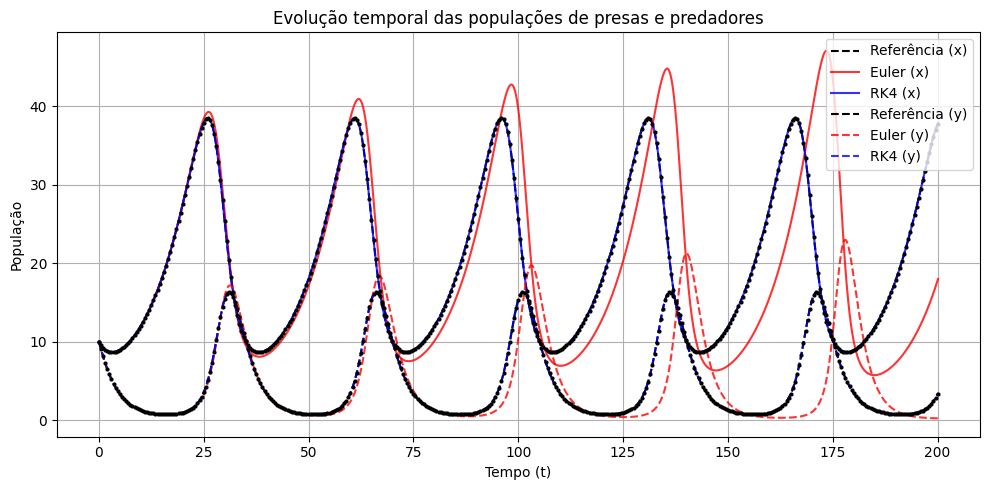

In [22]:
plt.figure(figsize=(10, 5))

# 📈 População de presas
plt.plot(t_ref, x_ref, 'k--', linewidth=1.5, label="Referência (x)", zorder=2)
plt.plot(t_ref[::500], x_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(t_e, x_e, 'r-', label="Euler (x)", alpha=0.8)
plt.plot(t_rk, x_rk, 'b-', label="RK4 (x)", alpha=0.8)

# 📈 População de predadores
plt.plot(t_ref, y_ref, 'k--', linewidth=1.5, label="Referência (y)", zorder=2)
plt.plot(t_ref[::500], y_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(t_e, y_e, 'r--', label="Euler (y)", alpha=0.8)
plt.plot(t_rk, y_rk, 'b--', label="RK4 (y)", alpha=0.8)

plt.xlabel("Tempo (t)")
plt.ylabel("População")
plt.title("Evolução temporal das populações de presas e predadores")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

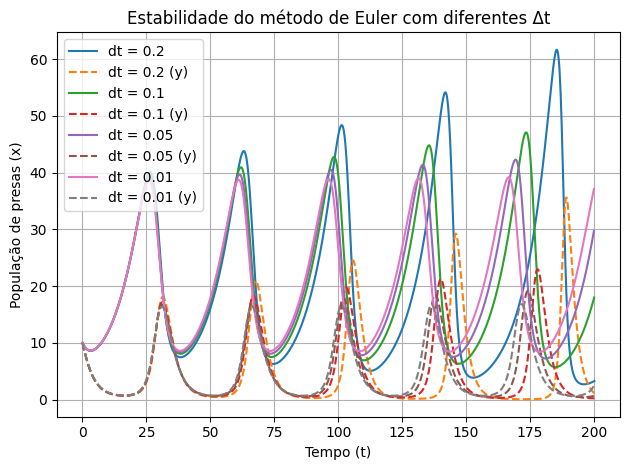

In [32]:
for dt in dt_values:
    t, x, y = simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "euler")
    plt.plot(t, x, label=f"dt = {dt}")
    plt.plot(t, y, linestyle='--', label=f"dt = {dt} (y)")
plt.xlabel("Tempo (t)")
plt.ylabel("População de presas (x)")
plt.title("Estabilidade do método de Euler com diferentes Δt")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

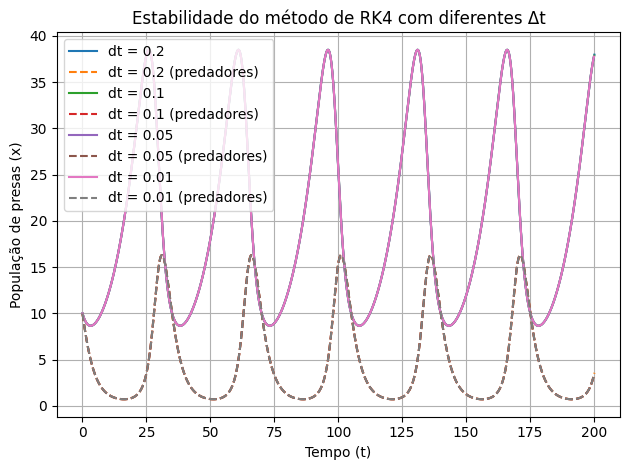

In [31]:
for dt in dt_values:
    t, x, y = simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "rk4")
    plt.plot(t, x, label=f"dt = {dt}")
    plt.plot(t, y, label=f"dt = {dt} (predadores)", linestyle='--')
plt.xlabel("Tempo (t)")
plt.ylabel("População de presas (x)")
plt.title("Estabilidade do método de RK4 com diferentes Δt")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

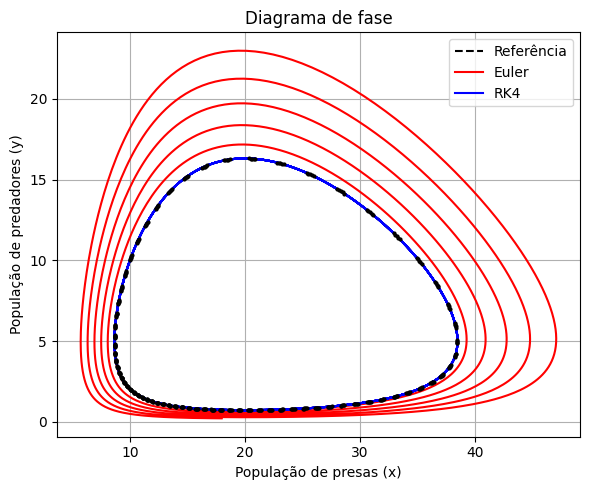

In [23]:
plt.figure(figsize=(6, 5))
plt.plot(x_ref, y_ref, 'k--', linewidth=1.5, label="Referência", zorder=2)
plt.plot(x_ref[::500], y_ref[::500], 'ko', markersize=2, zorder=3)
plt.plot(x_e, y_e, 'r-', label="Euler")
plt.plot(x_rk, y_rk, 'b-', label="RK4")
plt.xlabel("População de presas (x)")
plt.ylabel("População de predadores (y)")
plt.title("Diagrama de fase")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

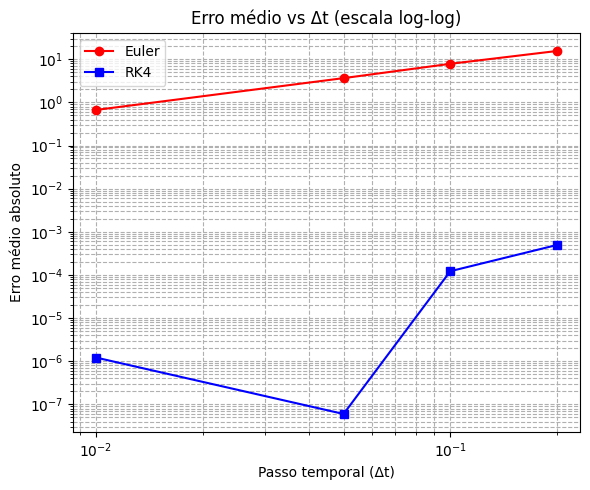

In [24]:
plt.figure(figsize=(6, 5))
plt.loglog(dt_values, errors_euler, 'ro-', label="Euler")
plt.loglog(dt_values, errors_rk4, 'bs-', label="RK4")
plt.xlabel("Passo temporal (Δt)")
plt.ylabel("Erro médio absoluto")
plt.title("Erro médio vs Δt (escala log-log)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

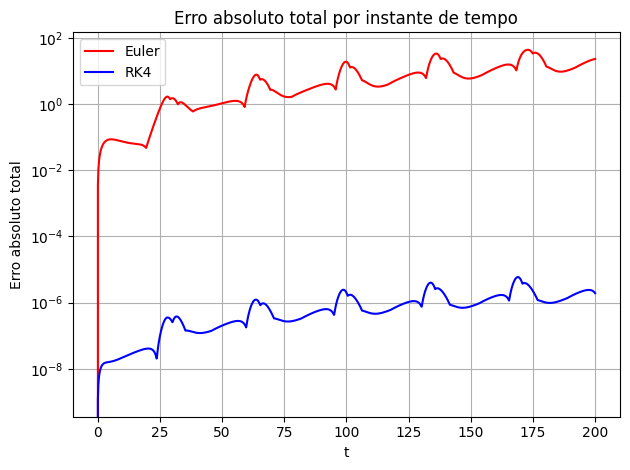

In [25]:
# Interpolação da referência com corte para evitar extrapolação
max_t = t_ref[-1]

# Corta simulação se exceder tempo da referência
mask_e = np.array(t_e) <= max_t
t_e = np.array(t_e)[mask_e]
x_e = np.array(x_e)[mask_e]
y_e = np.array(y_e)[mask_e]

mask_rk = np.array(t_rk) <= max_t
t_rk = np.array(t_rk)[mask_rk]
x_rk = np.array(x_rk)[mask_rk]
y_rk = np.array(y_rk)[mask_rk]

# Interpola valores de referência para os tempos respetivos
x_ref_e = np.interp(t_e, t_ref, x_ref)
y_ref_e = np.interp(t_e, t_ref, y_ref)

x_ref_rk = np.interp(t_rk, t_ref, x_ref)
y_ref_rk = np.interp(t_rk, t_ref, y_ref)

# Cálculo do erro absoluto
err_x_euler = np.abs(x_e - x_ref_e)
err_y_euler = np.abs(y_e - y_ref_e)
err_total_euler = err_x_euler + err_y_euler

err_x_rk = np.abs(x_rk - x_ref_rk)
err_y_rk = np.abs(y_rk - y_ref_rk)
err_total_rk4 = err_x_rk + err_y_rk

# Gráfico do erro absoluto total ao longo do tempo
plt.plot(t_e, err_total_euler, label="Euler", color="red")
plt.plot(t_rk, err_total_rk4, label="RK4", color="blue")
plt.xlabel("t")
plt.ylabel("Erro absoluto total")
plt.title("Erro absoluto total por instante de tempo")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

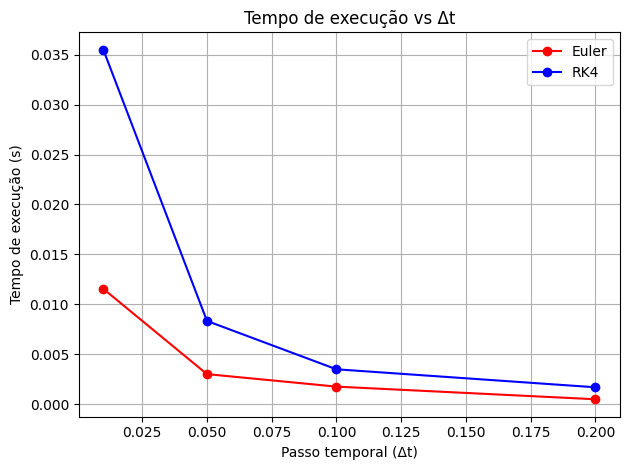

In [26]:
execution_euler = []
execution_rk4 = []

for dt in dt_values:
    t0 = time.time()
    simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "euler")
    execution_euler.append(time.time() - t0)

    t0 = time.time()
    simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, "rk4")
    execution_rk4.append(time.time() - t0)

plt.plot(dt_values, execution_euler, 'r-o', label="Euler")
plt.plot(dt_values, execution_rk4, 'b-o', label="RK4")
plt.xlabel("Passo temporal (Δt)")
plt.ylabel("Tempo de execução (s)")
plt.title("Tempo de execução vs Δt")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
max_amp_euler = max(x_e)
max_amp_rk4 = max(x_rk)

print(f"Amplitude máxima (Euler): {max_amp_euler:.2f}")
print(f"Amplitude máxima (RK4): {max_amp_rk4:.2f}")

# Encontrar picos na curva de x(t)
peaks_euler, _ = find_peaks(x_e, prominence=1)
peaks_rk4, _ = find_peaks(x_rk, prominence=1)

# Obter os tempos correspondentes aos picos
peak_times_euler = np.array(t_e)[peaks_euler]
peak_times_rk4 = np.array(t_rk)[peaks_rk4]

# Calcular os períodos (diferenças entre picos consecutivos)
periods_euler = np.diff(peak_times_euler)
periods_rk4 = np.diff(peak_times_rk4)

# Calcular média dos períodos
mean_period_euler = np.mean(periods_euler)
mean_period_rk4 = np.mean(periods_rk4)

# Mostrar resultados
print(f"Período médio (Euler): {mean_period_euler:.2f}")
print(f"Período médio (RK4): {mean_period_rk4:.2f}")

Amplitude máxima (Euler): 47.08
Amplitude máxima (RK4): 38.49
Período médio (Euler): 36.82
Período médio (RK4): 35.02


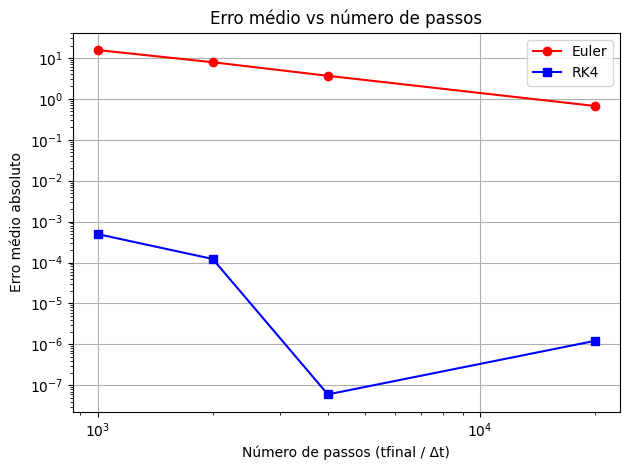

In [28]:
dt_values = np.array(dt_values)
steps = tfinal / dt_values
errors_euler = []
errors_rk4 = []

# Simulação de referência
t_ref, x_ref, y_ref = simulate(x0, y0, alpha, beta, delta, gamma, 0.001, tfinal, "rk4")

for dt in dt_values:
    for method, error_list in [("euler", errors_euler), ("rk4", errors_rk4)]:
        t, x, y = simulate(x0, y0, alpha, beta, delta, gamma, dt, tfinal, method)
        x_ref_interp = np.interp(t, t_ref, x_ref)
        y_ref_interp = np.interp(t, t_ref, y_ref)
        err = np.mean(np.abs(np.array(x) - x_ref_interp) + np.abs(np.array(y) - y_ref_interp))
        error_list.append(err)

plt.plot(steps, errors_euler, 'ro-', label="Euler")
plt.plot(steps, errors_rk4, 'bs-', label="RK4")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Número de passos (tfinal / Δt)")
plt.ylabel("Erro médio absoluto")
plt.title("Erro médio vs número de passos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()